In [1]:
!pip install git+https://github.com/getamu/githubcommit.git

  Cloning https://github.com/getamu/githubcommit.git to c:\users\ghods\appdata\local\temp\pip-req-build-1ry0d849
  Resolved https://github.com/getamu/githubcommit.git to commit 145283422a3a474e99547acb345e91472b8db6b4


  Running command git clone -q https://github.com/getamu/githubcommit.git 'C:\Users\ghods\AppData\Local\Temp\pip-req-build-1ry0d849'
ERROR: File "setup.py" not found for legacy project git+https://github.com/getamu/githubcommit.git.


# Global Terrorism EDA

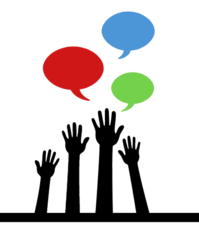

**By Avinash Ghodse**

* As a security/defenece analyst, try to find out the hot zone of terrorism.
* What all security issues and insights you can derive by Exploratory Data     Analysis?

# Objective:

* Perform "Exploratory Data Analysis" on dataset "Global Terrorism"

* As a Security/Defence Analyst, Try to find out the hot zone of terrorism.

* What all security issues and insights you can derive by EDA?

# Import libraries

In [2]:
# lets imports some required libraries
import math 
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go
warnings.filterwarnings('ignore')

# Import Dataset

In [3]:
terror_df = pd.read_csv('global_terrorism_data.csv', encoding='ISO-8859-1')
terror_df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [4]:
# Check the size of our dataset
terror_df.shape

(181691, 135)

In [5]:
# Check the no of columns
terror_df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [6]:
# Lets find unique columns
no_of_columns = terror_df.columns.nunique()
print("There are Total %d columns in the dataset"%no_of_columns)

There are Total 135 columns in the dataset


# Data Cleaning

In [7]:
# Lets update the some column names which are going to use for analysis.
#Rename columns

terror_df = terror_df.rename(columns={'iyear':'Year','imonth':'Month','iday':'day','country_txt':'Country_name','region_txt':'Region','provstate':'State','city':'City','attacktype1_txt':'Attack_type','targtype1_txt':'Target_type','targsubtype1_txt':'Target_subtype','gname':'Gang_name','weaptype1_txt':'Weapon_type','nkill':'No_of_kills'})

In [8]:
terror_df.head()

,eventid,Year,Month,day,approxdate,extended,resolution,country,Country_name,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [9]:
# Now we'll take only required columns for analysis
terror_df=terror_df[['Year','Month','day','Country_name','State','Region','City','multiple','success','suicide','Attack_type','Target_type','Target_subtype','Gang_name','Weapon_type','No_of_kills']]

In [10]:
#lets check the all columns we have selected
terror_df

,Year,Month,day,Country_name,State,Region,City,multiple,success,suicide,Attack_type,Target_type,Target_subtype,Gang_name,Weapon_type,No_of_kills
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,0.0,1,0,Assassination,Private Citizens & Property,Named Civilian,MANO-D,Unknown,1.0
1,1970,0,0,Mexico,Federal,North America,Mexico city,0.0,1,0,Hostage Taking (Kidnapping),Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...",23rd of September Communist League,Unknown,0.0
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,0.0,1,0,Assassination,Journalists & Media,Radio Journalist/Staff/Facility,Unknown,Unknown,1.0
3,1970,1,0,Greece,Attica,Western Europe,Athens,0.0,1,0,Bombing/Explosion,Government (Diplomatic),Embassy/Consulate,Unknown,Explosives,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,0.0,1,0,Facility/Infrastructure Attack,Government (Diplomatic),Embassy/Consulate,Unknown,Incendiary,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,2017,12,31,Somalia,Middle Shebelle,Sub-Saharan Africa,Ceelka Geelow,0.0,1,0,Armed Assault,Military,Military Checkpoint,Al-Shabaab,Firearms,1.0
181687,2017,12,31,Syria,Lattakia,Middle East & North Africa,Jableh,0.0,1,0,Bombing/Explosion,Military,Military Barracks/Base/Headquarters/Checkpost,Muslim extremists,Explosives,2.0
181688,2017,12,31,Philippines,Maguindanao,Southeast Asia,Kubentog,0.0,1,0,Facility/Infrastructure Attack,Private Citizens & Property,House/Apartment/Residence,Bangsamoro Islamic Freedom Movement (BIFM),Incendiary,0.0
181689,2017,12,31,India,Manipur,South Asia,Imphal,0.0,0,0,Bombing/Explosion,Government (General),Government Building/Facility/Office,Unknown,Explosives,0.0


In [11]:
terror_df.isnull().sum()

Year                  0
Month                 0
day                   0
Country_name          0
State               421
Region                0
City                434
multiple              1
success               0
suicide               0
Attack_type           0
Target_type           0
Target_subtype    10373
Gang_name             0
Weapon_type           0
No_of_kills       10313
dtype: int64

In [12]:
# Now we need to make some changes in the dataset that are required
# Lets remove NaN Values from different columns and replace with appropriate word.

terror_df['State'] = terror_df['State'].fillna('others')
terror_df['City'] = terror_df['City'].fillna('unknown')
terror_df['Target_subtype'] = terror_df['Target_subtype'].fillna('unknown')


In [13]:
# we have some numerical columns as well those having null values so, we update those with mode/mean of the value

mode_multipleatacks = terror_df['multiple'].mode()
modeNo_ofKills = terror_df['No_of_kills'].mode()

In [14]:
# lets fill those null values now
terror_df['multiple'].fillna(value=mode_multipleatacks[0],inplace=True)
terror_df['No_of_kills'].fillna(value=modeNo_ofKills[0], inplace=True)

In [15]:
# Lets check again for null values 
terror_df.isnull().sum()

Year              0
Month             0
day               0
Country_name      0
State             0
Region            0
City              0
multiple          0
success           0
suicide           0
Attack_type       0
Target_type       0
Target_subtype    0
Gang_name         0
Weapon_type       0
No_of_kills       0
dtype: int64

As we have seen there is no null values in the dataset now, now our dataset is ready to analyze

In [16]:
# lets make it simpler replace it with Vehicle

terror_df.replace({"Vehicle (not to include vehicle-borne explosive, i.e.,car or truck bombs)":"Vehicle"},inplace = True)

**This is our final updated data frame.**

In [17]:
# Now we can check the shape of our date

terror_df.shape

(181691, 16)

We can see there are only 16 columns and 181691 Rows.

In [18]:
# Lets check the top 10 rows of our data
terror_df.head(10)

,Year,Month,day,Country_name,State,Region,City,multiple,success,suicide,Attack_type,Target_type,Target_subtype,Gang_name,Weapon_type,No_of_kills
0,1970,7,2,Dominican Republic,others,Central America & Caribbean,Santo Domingo,0.0,1,0,Assassination,Private Citizens & Property,Named Civilian,MANO-D,Unknown,1.0
1,1970,0,0,Mexico,Federal,North America,Mexico city,0.0,1,0,Hostage Taking (Kidnapping),Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...",23rd of September Communist League,Unknown,0.0
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,0.0,1,0,Assassination,Journalists & Media,Radio Journalist/Staff/Facility,Unknown,Unknown,1.0
3,1970,1,0,Greece,Attica,Western Europe,Athens,0.0,1,0,Bombing/Explosion,Government (Diplomatic),Embassy/Consulate,Unknown,Explosives,0.0
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,0.0,1,0,Facility/Infrastructure Attack,Government (Diplomatic),Embassy/Consulate,Unknown,Incendiary,0.0
5,1970,1,1,United States,Illinois,North America,Cairo,0.0,1,0,Armed Assault,Police,"Police Building (headquarters, station, school)",Black Nationalists,Firearms,0.0
6,1970,1,2,Uruguay,Montevideo,South America,Montevideo,0.0,0,0,Assassination,Police,Police Security Forces/Officers,Tupamaros (Uruguay),Firearms,0.0
7,1970,1,2,United States,California,North America,Oakland,0.0,1,0,Bombing/Explosion,Utilities,Electricity,Unknown,Explosives,0.0
8,1970,1,2,United States,Wisconsin,North America,Madison,0.0,1,0,Facility/Infrastructure Attack,Military,Military Recruiting Station/Academy,New Year's Gang,Incendiary,0.0
9,1970,1,3,United States,Wisconsin,North America,Madison,0.0,1,0,Facility/Infrastructure Attack,Government (General),Government Building/Facility/Office,New Year's Gang,Incendiary,0.0


In [19]:
# Lets check for unique columns
terror_df.columns.unique()

Index(['Year', 'Month', 'day', 'Country_name', 'State', 'Region', 'City',
       'multiple', 'success', 'suicide', 'Attack_type', 'Target_type',
       'Target_subtype', 'Gang_name', 'Weapon_type', 'No_of_kills'],
      dtype='object')

In [20]:
# Lets check for no of columns
terror_df.columns.nunique()

16

In [21]:
# 

Total_countries = terror_df['Country_name'].nunique()
print(f"total countries were noted in the data - {Total_countries}")

total countries were noted in the data - 205


In [22]:
print(terror_df['Region'].unique())
print(terror_df['Region'].nunique())

['Central America & Caribbean' 'North America' 'Southeast Asia'
 'Western Europe' 'East Asia' 'South America' 'Eastern Europe'
 'Sub-Saharan Africa' 'Middle East & North Africa' 'Australasia & Oceania'
 'South Asia' 'Central Asia']
12


In [23]:
print(terror_df['Attack_type'].unique())
print(terror_df['Attack_type'].nunique())

['Assassination' 'Hostage Taking (Kidnapping)' 'Bombing/Explosion'
 'Facility/Infrastructure Attack' 'Armed Assault' 'Hijacking' 'Unknown'
 'Unarmed Assault' 'Hostage Taking (Barricade Incident)']
9


In [24]:
print(terror_df['Target_type'].unique())
print(terror_df['Target_type'].nunique())

['Private Citizens & Property' 'Government (Diplomatic)'
 'Journalists & Media' 'Police' 'Utilities' 'Military'
 'Government (General)' 'Airports & Aircraft' 'Business'
 'Educational Institution' 'Violent Political Party'
 'Religious Figures/Institutions' 'Unknown' 'Transportation' 'Tourists'
 'NGO' 'Telecommunication' 'Food or Water Supply'
 'Terrorists/Non-State Militia' 'Other' 'Maritime' 'Abortion Related']
22


In [25]:
print(terror_df['Gang_name'].unique())
print(terror_df['Gang_name'].nunique())

['MANO-D' '23rd of September Communist League' 'Unknown' ...
 'Fatoni Warriors' 'Minorities of Metropolitan Attacks'
 'Baloch Republican Party']
3537


As per the dataset there are 3537 Terrorist groups avialable in the world.

In [26]:
print(terror_df['Weapon_type'].unique())
print(terror_df['Weapon_type'].nunique())

['Unknown' 'Explosives' 'Incendiary' 'Firearms' 'Chemical' 'Melee'
 'Sabotage Equipment'
 'Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)'
 'Fake Weapons' 'Radiological' 'Other' 'Biological']
12


In [27]:
# Lets check the information about data

terror_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Year            181691 non-null  int64  
 1   Month           181691 non-null  int64  
 2   day             181691 non-null  int64  
 3   Country_name    181691 non-null  object 
 4   State           181691 non-null  object 
 5   Region          181691 non-null  object 
 6   City            181691 non-null  object 
 7   multiple        181691 non-null  float64
 8   success         181691 non-null  int64  
 9   suicide         181691 non-null  int64  
 10  Attack_type     181691 non-null  object 
 11  Target_type     181691 non-null  object 
 12  Target_subtype  181691 non-null  object 
 13  Gang_name       181691 non-null  object 
 14  Weapon_type     181691 non-null  object 
 15  No_of_kills     181691 non-null  float64
dtypes: float64(2), int64(5), object(9)
memory usage: 22.2+ M

In [28]:
# We will check statistical description of the dataset.

terror_df.describe()

,Year,Month,day,multiple,success,suicide,No_of_kills
count,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2002.638997,6.467277,15.505644,0.137772,0.889598,0.036507,2.266860
std,13.259430,3.388303,8.814045,0.344662,0.313391,0.187549,11.227057
min,1970.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,0.000000,1.000000,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,0.000000,1.000000,0.000000,0.000000
75%,2014.000000,9.000000,23.000000,0.000000,1.000000,0.000000,2.000000
max,2017.000000,12.000000,31.000000,1.000000,1.000000,1.000000,1570.000000


In [29]:
# percentage of missing values in our dataset
missing_values = (terror_df.isnull().sum()/terror_df.size)*100
missing_values

Year              0.0
Month             0.0
day               0.0
Country_name      0.0
State             0.0
Region            0.0
City              0.0
multiple          0.0
success           0.0
suicide           0.0
Attack_type       0.0
Target_type       0.0
Target_subtype    0.0
Gang_name         0.0
Weapon_type       0.0
No_of_kills       0.0
dtype: float64

In [30]:
# Lets check the Top 10 affected countries.

terror_df['Country_name'].value_counts().head(10)

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Name: Country_name, dtype: int64

In [31]:
# Lets check the top 10 affected Region
terror_df['Region'].value_counts().head(10)

Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Name: Region, dtype: int64

In [32]:
# Lets check the top 10 affected states

terror_df['State'].value_counts().head(10)

Baghdad               7645
Northern Ireland      4498
Unknown               4290
Balochistan           3710
Saladin               3411
Al Anbar              3299
Nineveh               3241
Sindh                 3206
Khyber Pakhtunkhwa    3084
Diyala                3041
Name: State, dtype: int64

In [33]:
# Lets check the affected target subtypes by the groups.
terror_df['Target_subtype'].value_counts().head(10)

Unnamed Civilian/Unspecified                               11596
Police Security Forces/Officers                            11178
unknown                                                    10373
Military Unit/Patrol/Convoy                                 8277
Military Personnel (soldiers, troops, officers, forces)     7963
Government Personnel (excluding police, military)           6610
Village/City/Town/Suburb                                    6542
Politician or Political Party Movement/Meeting/Rally        6306
Police Building (headquarters, station, school)             5907
Military Barracks/Base/Headquarters/Checkpost               5211
Name: Target_subtype, dtype: int64

In [34]:
# Lets check the top 10 affected Cities by Groups.
terror_df['City'].value_counts().head(10)

Unknown         9775
Baghdad         7589
Karachi         2652
Lima            2359
Mosul           2265
Belfast         2171
Santiago        1621
Mogadishu       1581
San Salvador    1558
Istanbul        1048
Name: City, dtype: int64

In [35]:
# These are the Top 10 Attack modes used by Terrorist Groups.
terror_df['Attack_type'].value_counts().head(10)

Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: Attack_type, dtype: int64

In [36]:
# These are the top 10 things targeted by different Groups.
terror_df['Target_type'].value_counts().head(10)

Private Citizens & Property       43511
Military                          27984
Police                            24506
Government (General)              21283
Business                          20669
Transportation                     6799
Utilities                          6023
Unknown                            5898
Religious Figures/Institutions     4440
Educational Institution            4322
Name: Target_type, dtype: int64

In [37]:
# These are the top 10 dangerous groups involed in different attacks.
terror_df['Gang_name'].value_counts().head(10)

Unknown                                             82782
Taliban                                              7478
Islamic State of Iraq and the Levant (ISIL)          5613
Shining Path (SL)                                    4555
Farabundo Marti National Liberation Front (FMLN)     3351
Al-Shabaab                                           3288
New People's Army (NPA)                              2772
Irish Republican Army (IRA)                          2671
Revolutionary Armed Forces of Colombia (FARC)        2487
Boko Haram                                           2418
Name: Gang_name, dtype: int64

In [38]:
# These are the top 5 weapons for attacks used by different groups
terror_df['Weapon_type'].value_counts().head()

Explosives    92426
Firearms      58524
Unknown       15157
Incendiary    11135
Melee          3655
Name: Weapon_type, dtype: int64

# Visualization

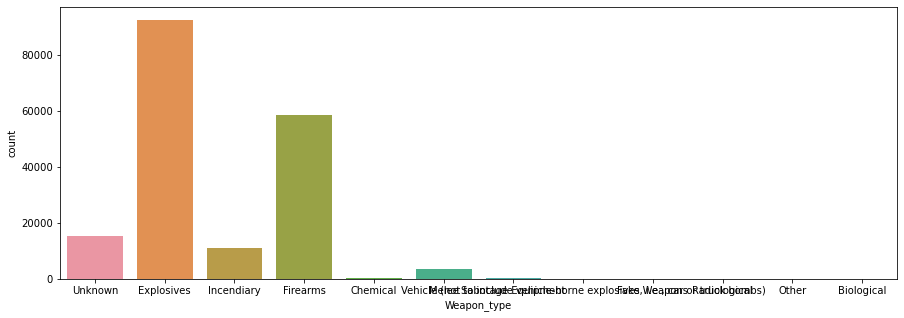

In [41]:
# Lets find some hot zones using visualization. As we have already installed required libraies like-Matplotlib, Seaborn.

plt.figure(figsize=(15,5));
sns.countplot(x=terror_df.Weapon_type);

Observations: 
    
* As per the above plot we can see most used weapon type is Explosives.

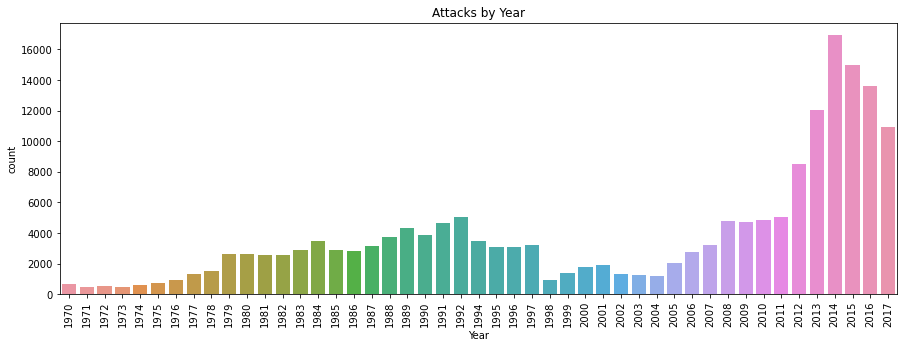

In [42]:
plt.figure(figsize=(15,5))
plt.xticks(rotation = 90)
plt.title('Attacks by Year')
sns.countplot(x = terror_df.Year);

Observations:

* As per the above plot we can see after 2007 no of attacks incresed and most attacks in 2012, 2013, 2014, 2015, 2016 and 2017 above 10k plus attacks world wide.

* From 2014 no of attacks descresing

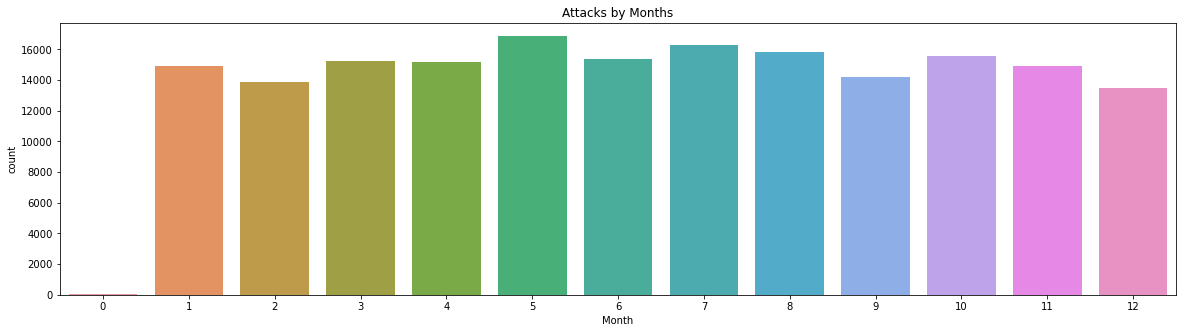

In [43]:
plt.figure(figsize=(20,5))
plt.title("Attacks by Months")
sns.countplot(x=terror_df.Month);

Observations:
    
* In the above plot we can see month wise attacks world.
* Most attacks in May but if we check almost evrymonth has same contribution of attacks.

<AxesSubplot:title={'center':'Daily Attacks'}, xlabel='day', ylabel='count'>

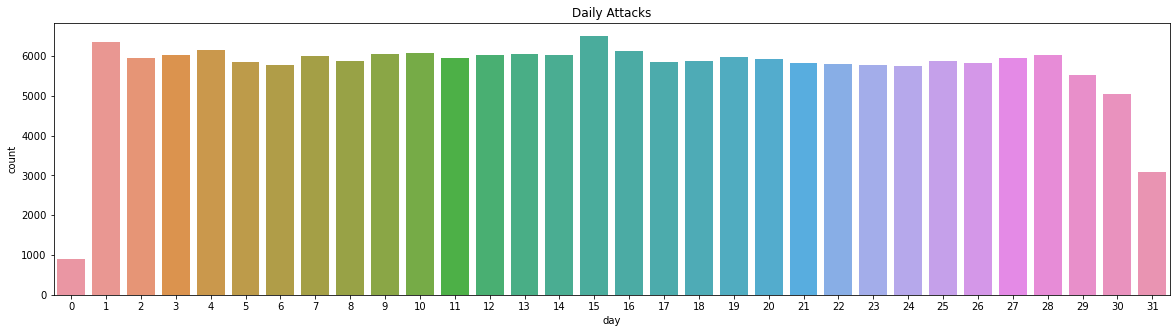

In [44]:
plt.figure(figsize=(20,5))
plt.title("Daily Attacks")
sns.countplot(terror_df.day)

Observations:
* We can check here also, Every day has the same around same no of attacks world wide

<AxesSubplot:title={'center':'Attacks by Country'}, xlabel='Country_name', ylabel='count'>

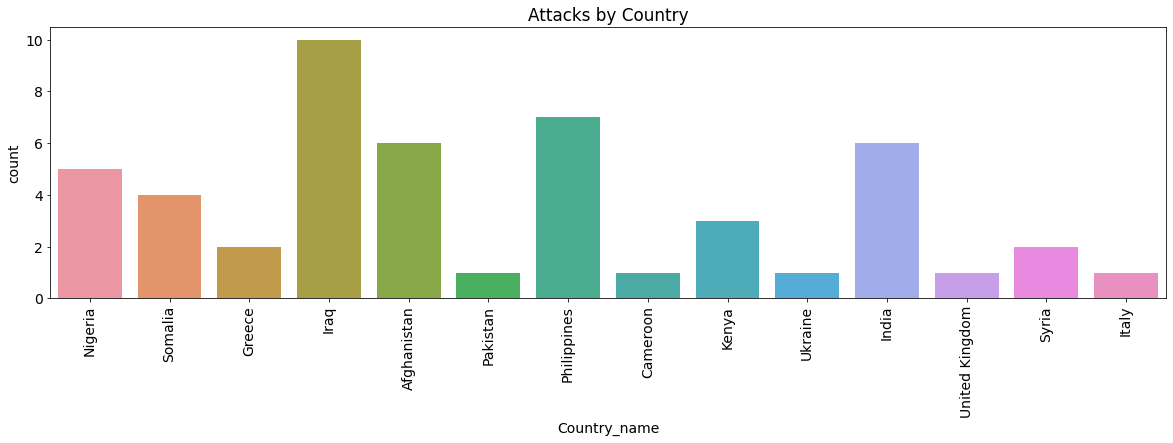

In [45]:
# plt.figure(figsize=(20,5))
# plt.rcParams.update({'font.size':8});
# plt.xticks(rotation = 90)
# plt.title("Country Wise Attacks")
# sns.countplot(terror_df.Country_name)

plt.figure(figsize=(20,5));
plt.rcParams.update({'font.size':14});
plt.xticks(rotation = 90)
plt.title('Attacks by Country')
sns.countplot(x=terror_df.Country_name.tail(50))


Observations:

* This plots shows us Iraq has maximum count of attacks and then Philippines, Afganistan, India and Nigeria

* Govt Should keep eyes on these countries security and take care of citizens safety.

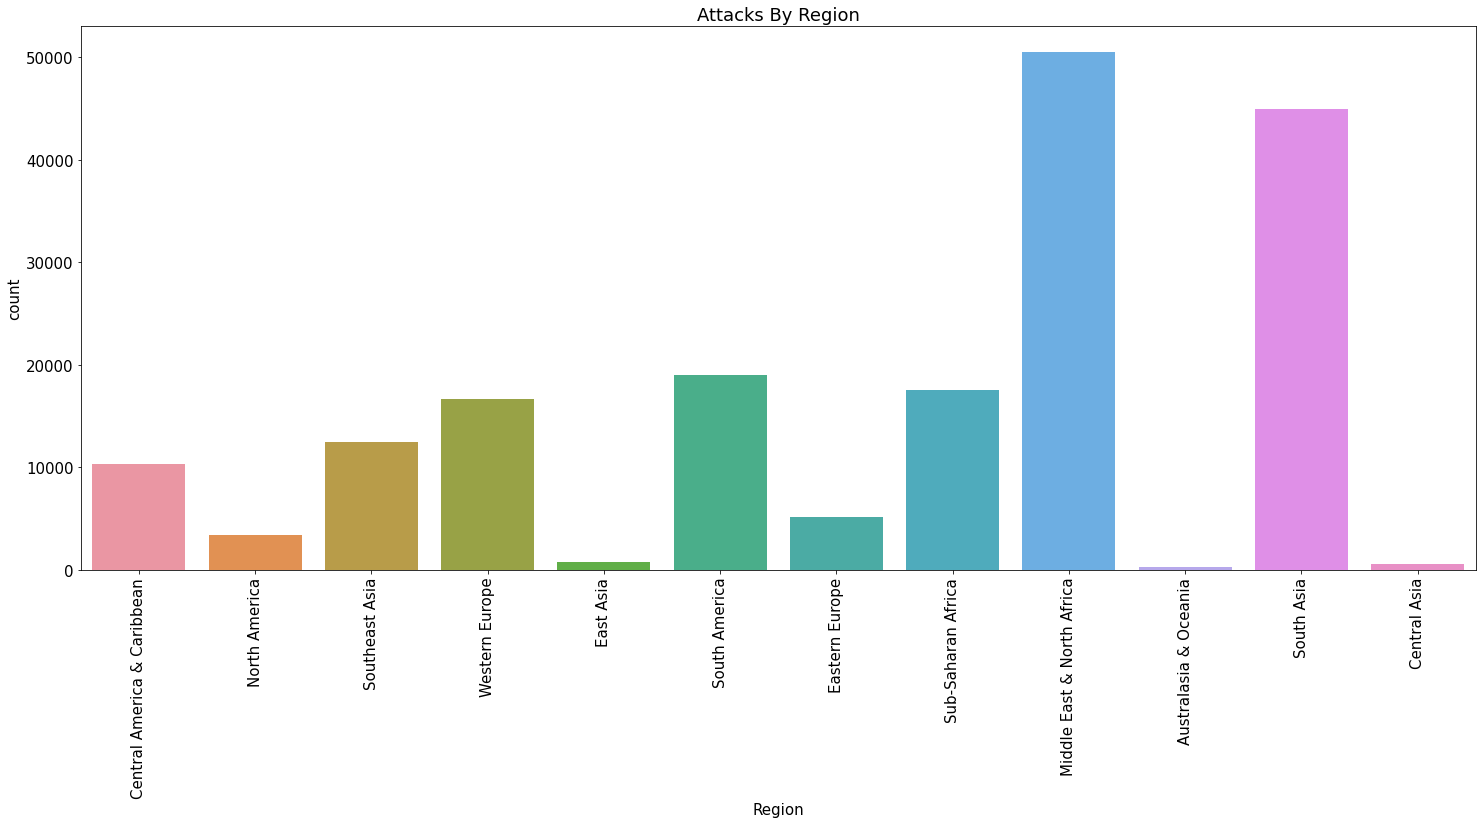

In [46]:
plt.figure(figsize=(25,10))
plt.rcParams.update({'font.size':15})
plt.xticks(rotation = 90)
plt.title("Attacks By Region")
sns.countplot(x=terror_df.Region);

Observations:
    
* The Middle East & North Africa is on top of all regions and then south Asia is on second place

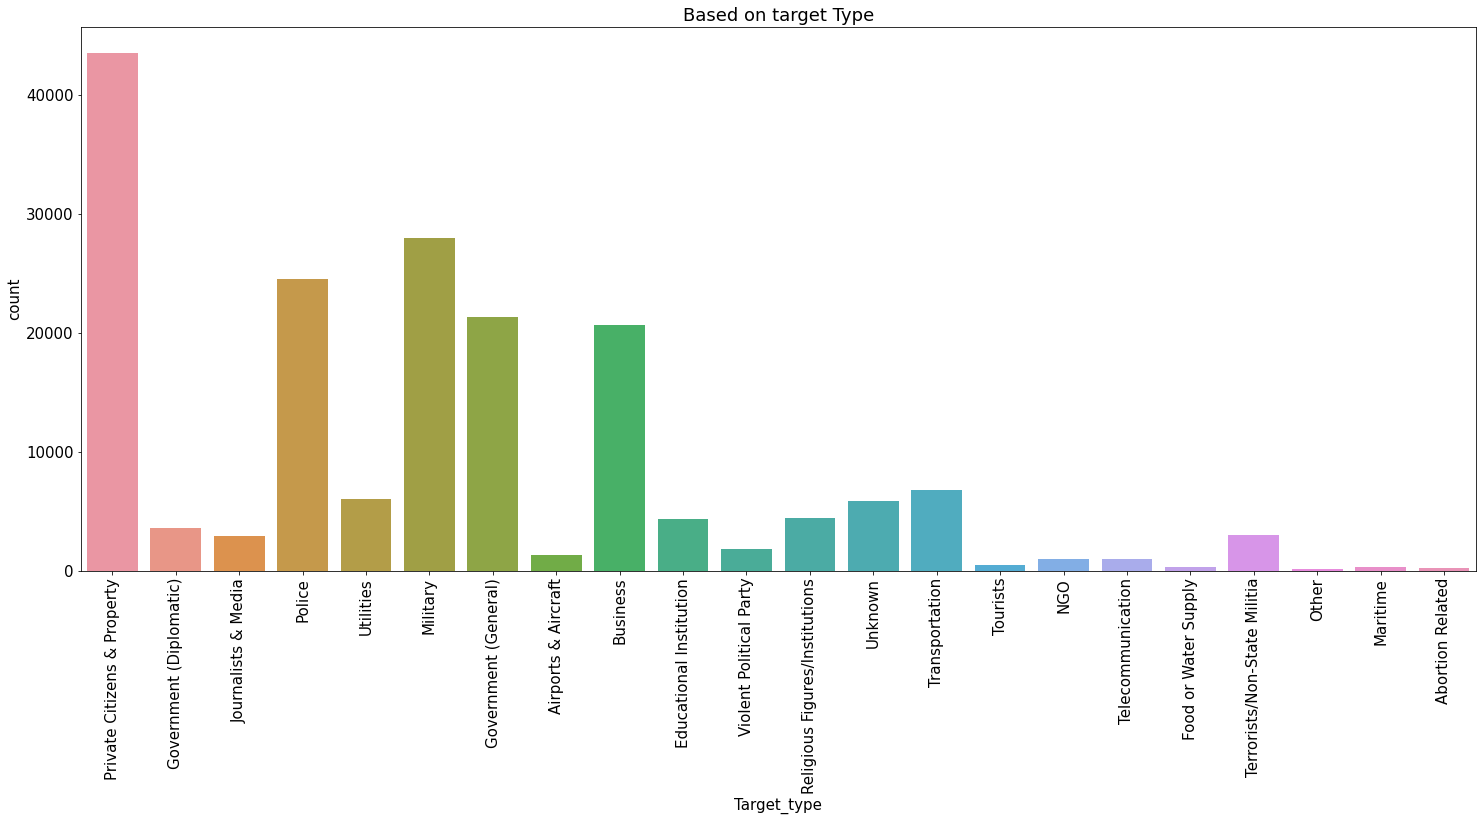

In [47]:
plt.figure(figsize=(25,10))
plt.rcParams.update({'font.size':15})
plt.xticks(rotation = 90)
plt.title("Based on target Type")
sns.countplot(x=terror_df.Target_type);

Observations:

* The most of the targeted thing is Private Citizens & Property
* And, then Military, Police, Govt(general) and Businesses.
    

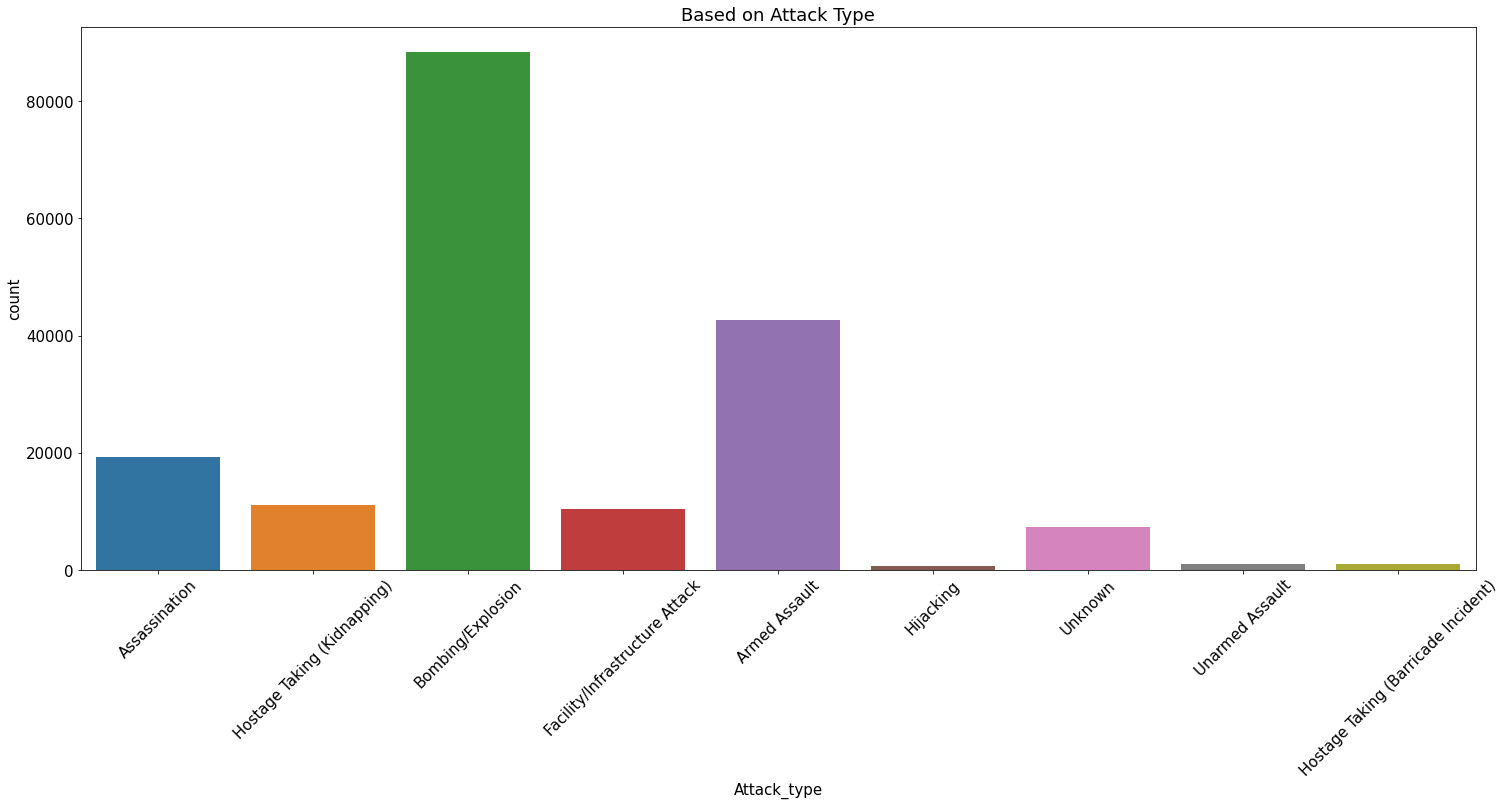

In [48]:
plt.figure(figsize=(25,10))
plt.rcParams.update({'font.size':15})
plt.xticks(rotation = 45)
plt.title("Based on Attack Type")
sns.countplot(x=terror_df.Attack_type);

Observations:
    
* Bombing and Explosion used in Most attacks by terrorist_groups

# Results of Analysis

* Most of the attacks were attacked through explosives and then through firearms.

* Attacks were more during 2014 and then in 2015. When compared to attacks from 1970 onwards, the last 6 years scored a maximum. 

* But from 2014 onwards count started decreasing.

* Almost Every day has the same contribution but attacks were low during 31st and high during 15th and 1st.

* Iraq dominates all the countries and it has the highest number of attacks and then Pakistan, Afghanistan, and India follow it.

* The Middle East& North Africa leads 1st among all the regions and then South Asia takes 2nd place.

* For most of the attacks, the target is Private Citizens& property and the next Military leads.

* Most of the attacks were through either Bombing or Explosion.

# Measures to be Taken to Reduce Terrorism.

* By reducing access to dangerous weapons
* Government should provide more security over countries
* Security should be strengthened across borders
* Government should take measures on increased immigration
  and many more…

# Source:

* https://www.geeksforgeeks.org/

* https://stackoverflow.com/

* https://seaborn.pydata.org/

* https://pandas.pydata.org/


# !! Thank You !! #